## NGO Funding Classification

Assume you are appointed as a Data scientist in any international humanitarian NGO, after the recent funding programmes, have been able to raise around $ 120 million. Now the CEO of the NGO call you to choose how to use this money strategically and effectively. The significant issues that comes while making this conclusion are mostly related to choosing the countries that are in the direst need of aid. Your job is to classify the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. Apply Principal component analysis, K-Means Clustering &amp; Hierarchical Clustering.

**Columns In Dataset**

- country: The name of the country for which the data is being recorded.

- child_mort: The child mortality rate, usually measured as the number of deaths of children under the age of 5 per 1,000 live births.

- exports: The total value of goods and services a country exports as a percentage of its Gross Domestic Product (GDP). It reflects the country's economic activity in international trade.

- health: Expenditure on health as a percentage of GDP. This includes government spending on healthcare services, hospitals, and medical care.

- imports: The total value of goods and services a country imports as a percentage of its GDP. This reflects the country's dependence on foreign goods and services.

- income: The average income of a country's population, typically measured in terms of Gross National Income (GNI) per capita or similar metrics. It gives an indication of the economic well-being of the population.

- inflation: The rate of inflation in the country, which is the percentage change in the general price level of goods and services over a specified period, usually a year.

- life_expec: Life expectancy at birth, representing the average number of years a newborn is expected to live if current mortality rates continue to apply.

- total_fer: The total fertility rate, which is the average number of children a woman would have in her lifetime if current birth rates remain the same.

- gdpp: Gross Domestic Product per capita, which is the GDP divided by the population of the country. It measures the average economic output per person and is a common indicator of the standard of living.

### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from math import sqrt
import seaborn as sns
from sklearn.metrics import classification_report

#### Data Importing

In [2]:
df=pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

#### Data Preparation

In [3]:
# Chaning columns name to get clear undersanding

In [4]:
df.rename(columns={'child_mort':'Child_Mortality_Rate','exports':'Exports','health':'Health','imports':'Imports','income':'Income','inflation':'Inflation','life_expec':'Life_Expectancy','total_fer':'Total_Fertility_Rate','gdpp':'Gross_Domestic_Product'},inplace=True)

In [5]:
# Top five head rows

In [6]:
df.head()

country  Child_Mortality_Rate  Exports  Health  Imports  \
0          Afghanistan                  90.2     10.0    7.58     44.9   
1              Albania                  16.6     28.0    6.55     48.6   
2              Algeria                  27.3     38.4    4.17     31.4   
3               Angola                 119.0     62.3    2.85     42.9   
4  Antigua and Barbuda                  10.3     45.5    6.03     58.9   

   Income  Inflation  Life_Expectancy  Total_Fertility_Rate  \
0    1610       9.44             56.2                  5.82   
1    9930       4.49             76.3                  1.65   
2   12900      16.10             76.5                  2.89   
3    5900      22.40             60.1                  6.16   
4   19100       1.44             76.8                  2.13   

   Gross_Domestic_Product  
0                     553  
1                    4090  
2                    4460  
3                    3530  
4                   12200

In [7]:
## Last five head rows

In [8]:
df.tail()

country  Child_Mortality_Rate  Exports  Health  Imports  Income  \
162    Vanuatu                  29.2     46.6    5.25     52.7    2950   
163  Venezuela                  17.1     28.5    4.91     17.6   16500   
164    Vietnam                  23.3     72.0    6.84     80.2    4490   
165      Yemen                  56.3     30.0    5.18     34.4    4480   
166     Zambia                  83.1     37.0    5.89     30.9    3280   

     Inflation  Life_Expectancy  Total_Fertility_Rate  Gross_Domestic_Product  
162       2.62             63.0                  3.50                    2970  
163      45.90             75.4                  2.47                   13500  
164      12.10             73.1                  1.95                    1310  
165      23.60             67.5                  4.67                    1310  
166      14.00             52.0                  5.40                    1460

In [9]:
#Description of dataset
df.describe()

Child_Mortality_Rate     Exports      Health     Imports  \
count            167.000000  167.000000  167.000000  167.000000   
mean              38.270060   41.108976    6.815689   46.890215   
std               40.328931   27.412010    2.746837   24.209589   
min                2.600000    0.109000    1.810000    0.065900   
25%                8.250000   23.800000    4.920000   30.200000   
50%               19.300000   35.000000    6.320000   43.300000   
75%               62.100000   51.350000    8.600000   58.750000   
max              208.000000  200.000000   17.900000  174.000000   

              Income   Inflation  Life_Expectancy  Total_Fertility_Rate  \
count     167.000000  167.000000       167.000000            167.000000   
mean    17144.688623    7.781832        70.555689              2.947964   
std     19278.067698   10.570704         8.893172              1.513848   
min       609.000000   -4.210000        32.100000              1.150000   
25%      3355.000000    1.810000        65.300000              1.795000   
50%      9960.000000    5.390000        73.100000              2.410000   
75%     22800.000000   10.750000        76.800000              3.880000   
max    125000.000000  104.000000        82.800000              7.490000   

       Gross_Domestic_Product  
count              167.000000  
mean             12964.155689  
std              18328.704809  
min                231.000000  
25%               1330.000000  
50%               4660.000000  
75%              14050.000000  
max             105000.000000

In [10]:
#Information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 167 non-null    object 
 1   Child_Mortality_Rate    167 non-null    float64
 2   Exports                 167 non-null    float64
 3   Health                  167 non-null    float64
 4   Imports                 167 non-null    float64
 5   Income                  167 non-null    int64  
 6   Inflation               167 non-null    float64
 7   Life_Expectancy         167 non-null    float64
 8   Total_Fertility_Rate    167 non-null    float64
 9   Gross_Domestic_Product  167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
#total number of countries present
con=df['country'].value_counts().sum()
print("Total Number Of Countries Present:- ",con)

Total Number Of Countries Present:-  167


In [12]:
#Null values in dataset
print("Null Values in Dataset :- ")
df.isnull().sum()

Null Values in Dataset :- 


country                   0
Child_Mortality_Rate      0
Exports                   0
Health                    0
Imports                   0
Income                    0
Inflation                 0
Life_Expectancy           0
Total_Fertility_Rate      0
Gross_Domestic_Product    0
dtype: int64

In [13]:
print("No of rows in a data :-",df.shape[0])
print("No of columns in data :-",df.shape[1])

No of rows in a data :- 167
No of columns in data :- 10


In [14]:
print("The columns in dataset are :- ")
df.columns

The columns in dataset are :- 


Index(['country', 'Child_Mortality_Rate', 'Exports', 'Health', 'Imports',
       'Income', 'Inflation', 'Life_Expectancy', 'Total_Fertility_Rate',
       'Gross_Domestic_Product'],
      dtype='object')

In [15]:
#Creating a copy of dataset
df1=df.copy()

## Exploratory Data Analysis

In [16]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

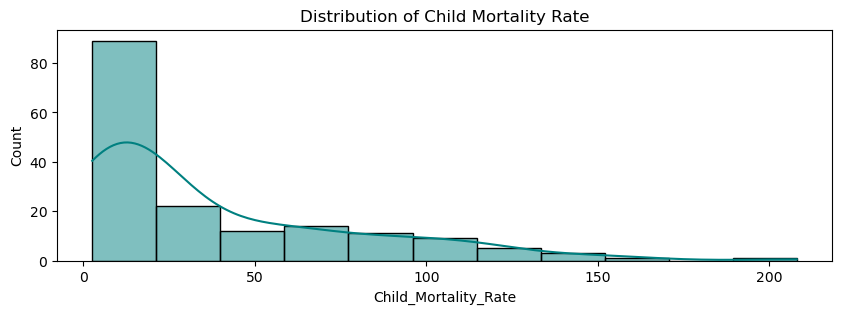

In [17]:
# 1. Distribution of Individual Variables
plt.figure(figsize=(10, 3))
sns.histplot(df['Child_Mortality_Rate'], kde=True,color='#008080')
plt.title('Distribution of Child Mortality Rate')
plt.show()

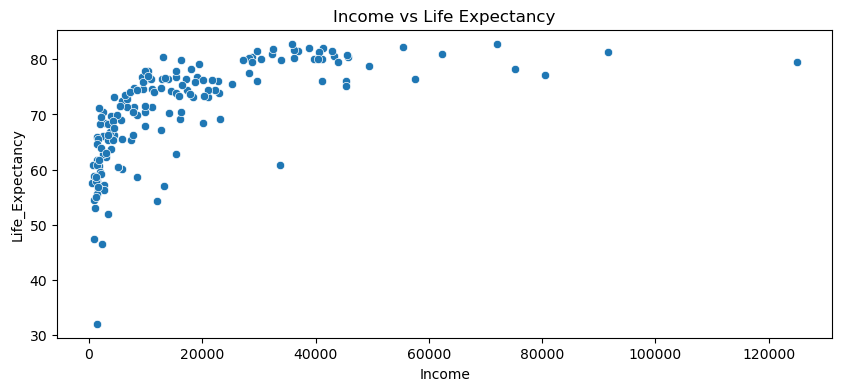

In [18]:
#Relationships Between Variables
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Income', y='Life_Expectancy', data=df)
plt.title('Income vs Life Expectancy')
plt.show()

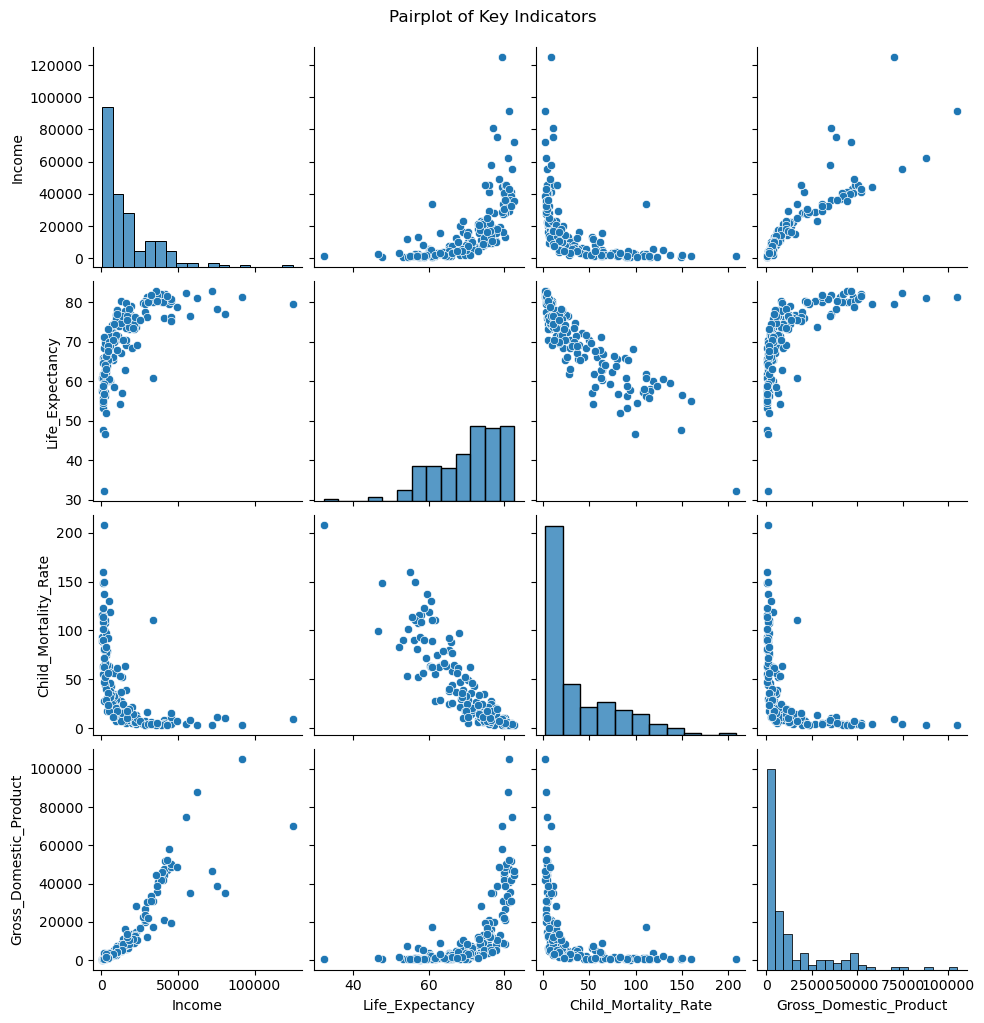

In [19]:
#Pair plot 
sns.pairplot(df[['Income', 'Life_Expectancy', 'Child_Mortality_Rate', 'Gross_Domestic_Product']])
plt.suptitle('Pairplot of Key Indicators', y=1.02)
plt.show()

In [20]:
#to use in heatmap
df2 = df.drop('country', axis=1)

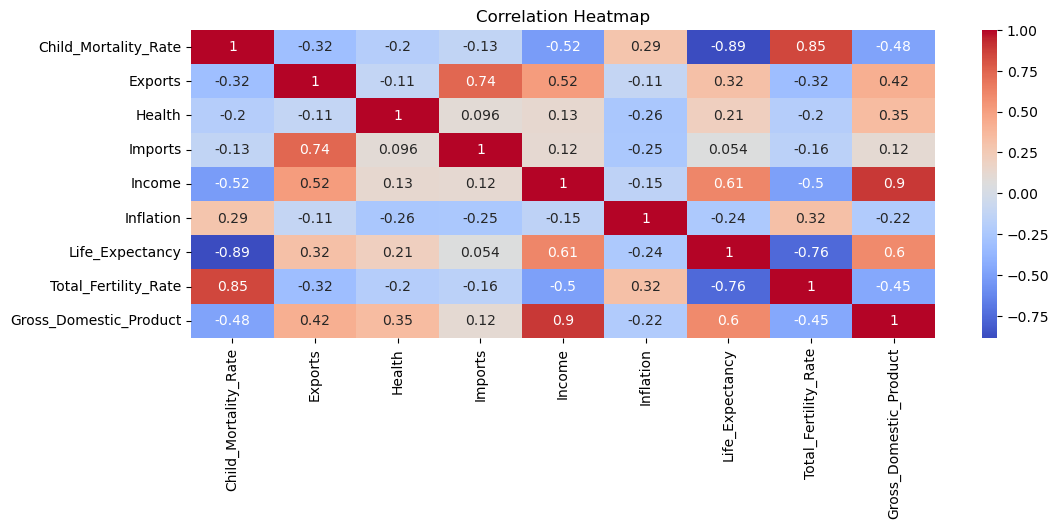

In [21]:
#Heatmap to show the corelation
plt.figure(figsize=(12, 4))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#Geographical Analysis 
fig = px.choropleth(df, locations='country', locationmode='country names', 
                    color='Child_Mortality_Rate', hover_name='country',
                    color_continuous_scale='Reds')
fig.update_layout(title_text='Child Mortality Rate Across Countries')
fig.show()

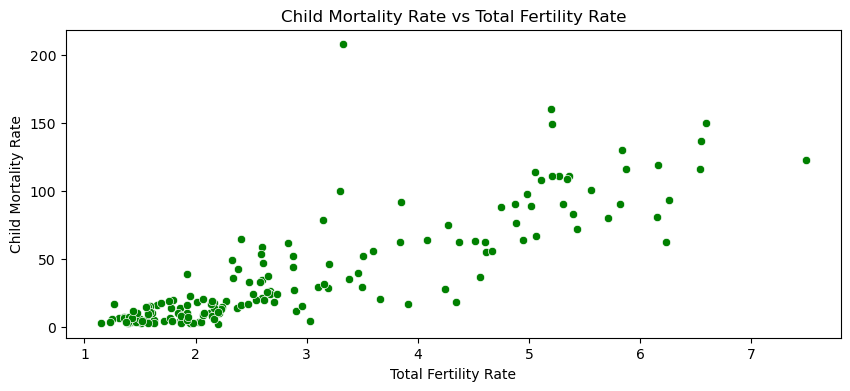

In [23]:
# Plot Child Mortality Rate vs Total Fertility Rate
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Total_Fertility_Rate', y='Child_Mortality_Rate', data=df,color='green')
plt.title('Child Mortality Rate vs Total Fertility Rate')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Child Mortality Rate')
plt.show()

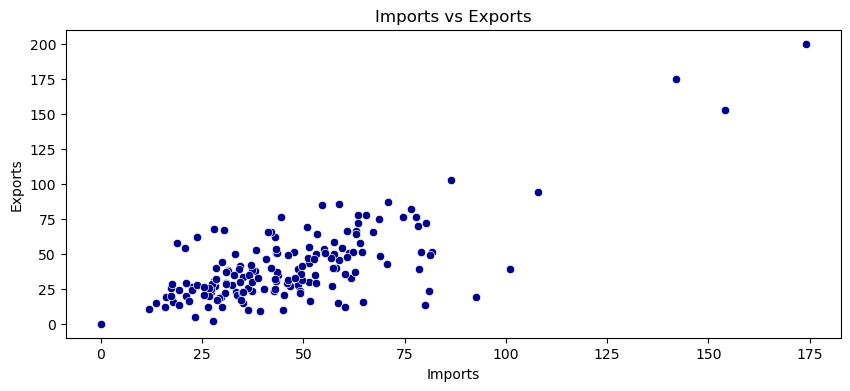

In [24]:
# Plot Imports vs Exports
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Imports', y='Exports', data=df,color='darkblue')
plt.title('Imports vs Exports')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

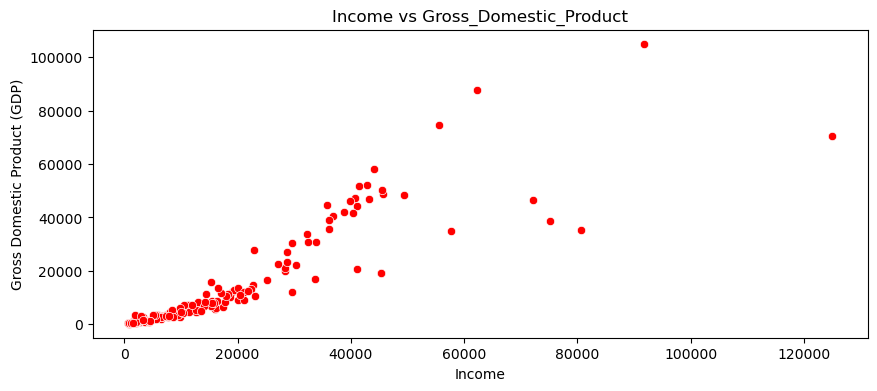

In [25]:
# Plot Income vs GDP
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Income', y='Gross_Domestic_Product', data=df,color='red')
plt.title('Income vs Gross_Domestic_Product')
plt.xlabel('Income')
plt.ylabel('Gross Domestic Product (GDP)')
plt.show()

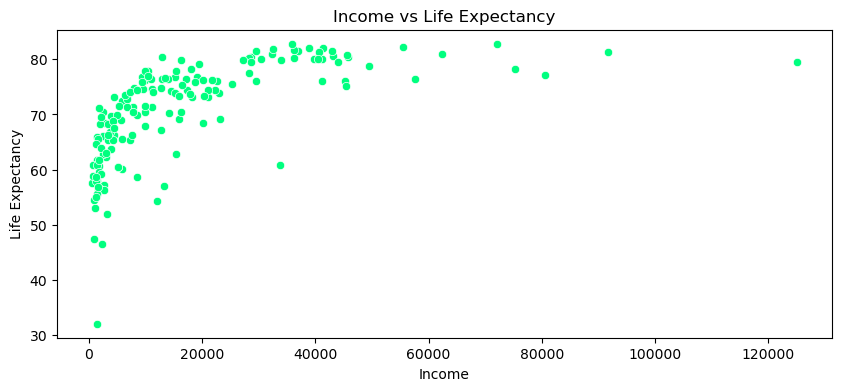

In [26]:
# Plot Income vs Life Expectancy
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Income', y='Life_Expectancy', data=df,color='#00FF7F')
plt.title('Income vs Life Expectancy')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.show()

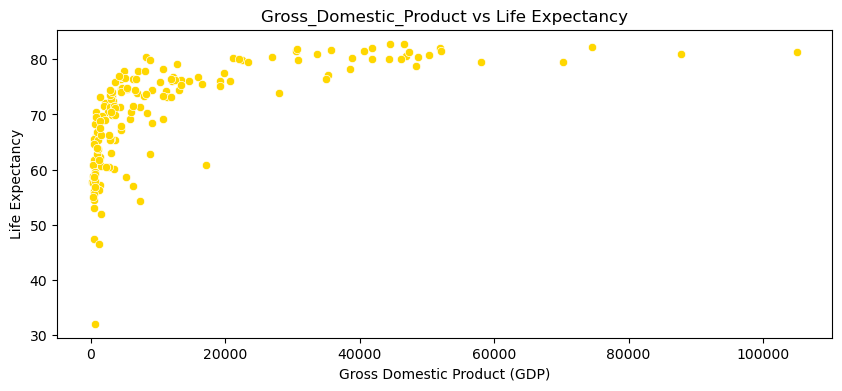

In [27]:
# Plot GDP vs Life Expectancy
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Gross_Domestic_Product', y='Life_Expectancy', data=df,color='#FFD700')
plt.title('Gross_Domestic_Product vs Life Expectancy')
plt.xlabel('Gross Domestic Product (GDP)')
plt.ylabel('Life Expectancy')
plt.show()

**Standardize the Data:**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('country', axis=1))

**Apply PCA**

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca_data = pca.fit_transform(scaled_data)

**Interpret Components:**

In [30]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]]
[0.4595174  0.17181626]


**K-Means Clustering**

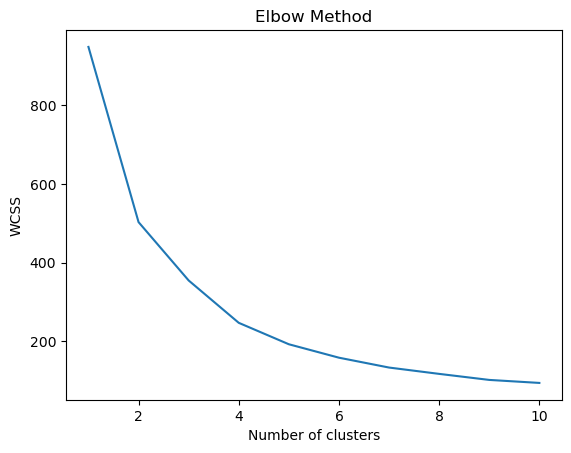

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Apply K-Means:**

In [32]:
print(df.dtypes)

country                    object
Child_Mortality_Rate      float64
Exports                   float64
Health                    float64
Imports                   float64
Income                      int64
Inflation                 float64
Life_Expectancy           float64
Total_Fertility_Rate      float64
Gross_Domestic_Product      int64
dtype: object


In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(pca_data)
df['Cluster'] = kmeans.labels_

In [36]:
numeric_columns = df.select_dtypes(include=[float, int])

In [37]:
df_numeric = df[numeric_columns.columns]  # Ensure only numeric columns are included
grouped_df = df_numeric.groupby(df['Cluster']).mean()
print(grouped_df)

         Child_Mortality_Rate     Exports    Health     Imports        Income  \
Cluster                                                                         
0                    4.133333  176.000000  6.793333  156.666667  64033.333333   
1                   11.974194   44.772043  7.426989   45.501075  25390.000000   
2                   74.156338   30.611254  6.015915   44.071351   4363.281690   

         Inflation  Life_Expectancy  Total_Fertility_Rate  \
Cluster                                                     
0         2.468000        81.433333              1.380000   
1         5.423946        76.524731              1.943871   
2        11.094859        62.277465              4.329437   

         Gross_Domestic_Product  Cluster  
Cluster                                   
0                  57566.666667      0.0  
1                  19881.182796      1.0  
2                   2019.211268      2.0  


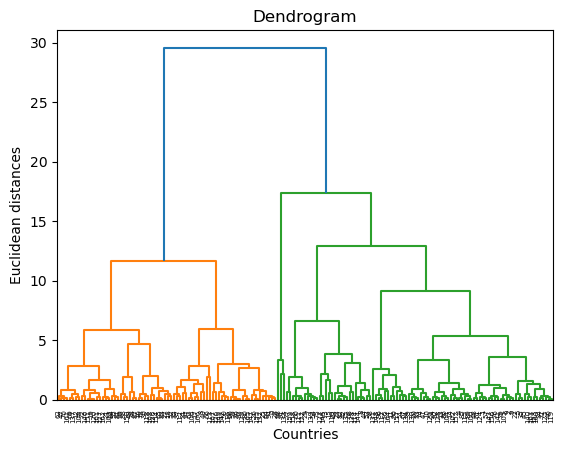

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pca_data, method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['HC_Cluster'] = hc.fit_predict(pca_data)

In [40]:
critical_clusters = df[df['Cluster'] == 2] 

In [41]:
target_countries = critical_clusters.sort_values(by=['Child_Mortality_Rate', 'Income'], ascending=[False, True])

In [42]:
print(target_countries['country'].unique())

['Haiti' 'Sierra Leone' 'Chad' 'Central African Republic' 'Mali' 'Nigeria'
 'Niger' 'Angola' 'Congo, Dem. Rep.' 'Burkina Faso' 'Guinea-Bissau'
 'Benin' "Cote d'Ivoire" 'Equatorial Guinea' 'Guinea' 'Cameroon'
 'Mozambique' 'Lesotho' 'Mauritania' 'Burundi' 'Pakistan' 'Malawi' 'Togo'
 'Afghanistan' 'Liberia' 'Comoros' 'Zambia' 'Uganda' 'Gambia' 'Lao'
 'Sudan' 'Ghana' 'Tanzania' 'Senegal' 'Myanmar' 'Congo, Rep.' 'Gabon'
 'Rwanda' 'Kiribati' 'Timor-Leste' 'Madagascar' 'Kenya' 'Turkmenistan'
 'India' 'Yemen' 'Namibia' 'Eritrea' 'South Africa' 'Botswana'
 'Tajikistan' 'Bangladesh' 'Nepal' 'Bolivia' 'Cambodia' 'Bhutan'
 'Micronesia, Fed. Sts.' 'Guyana' 'Iraq' 'Uzbekistan' 'Guatemala'
 'Indonesia' 'Philippines' 'Kyrgyz Republic' 'Vanuatu' 'Egypt'
 'Solomon Islands' 'Mongolia' 'Fiji' 'Samoa' 'Tonga' 'Sri Lanka']
